# Predictive Modeling for Bike Demand of BoomBikes in the American Market

## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

## Business Goal

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



# Data Understanding & Preparation:

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
# Reading and Understanding Data
bike= pd.read_csv('day.csv')
#reading the data
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [59]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dataset has 730 rows and 16 columns

In [60]:
#checking the size of the data
bike.shape 

(730, 16)

In [61]:
 #checking out for detailed info about the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [62]:
#Checking for count and the type of data present in the given dataset
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [63]:
#describes the total size of the dataset
bike.size 

11680

In [64]:
#checking for missing values
bike.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [65]:
#gives info about unique values present in data
bike.nunique() 

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

- No null values found in the data
- None of the columns have single unique value

In [66]:
#dropping instant column as it is merely a index column which has no significance for our target
bike.drop(['instant'],axis=1,inplace=True)
#dteday is not useful as month and weekday are covering it
bike.drop(['dteday'],axis=1,inplace=True)
#Removing casual and registered as cnt is sum of these
bike.drop(['casual'],axis=1,inplace=True)
bike.drop(['registered'],axis=1,inplace=True)
bike.shape

(730, 12)

In [67]:
#View data after dropping
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [68]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [69]:
#identifying all the column head
bike.columns 

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [70]:
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


#### So from the above correlation formed we can clearly see that season,month and weekday which are supposed to be non-numerical are numerical which should be changed

# Handling outliers

In [71]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [72]:
#gives info about unique values present in data
bike.nunique() 

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

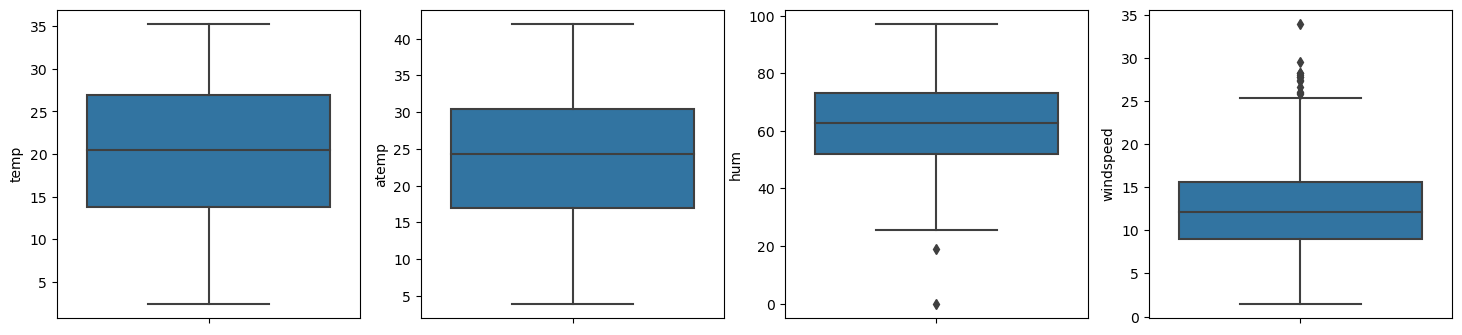

In [73]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

So from the above plots it is clear that we don't have any outliers

In [74]:
bike.shape

(730, 12)

# Data Analysis and Visualization

In [75]:
#seperating numerical and categorical variables
num_var=['temp','atemp','hum','windspeed','cnt']
cat_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

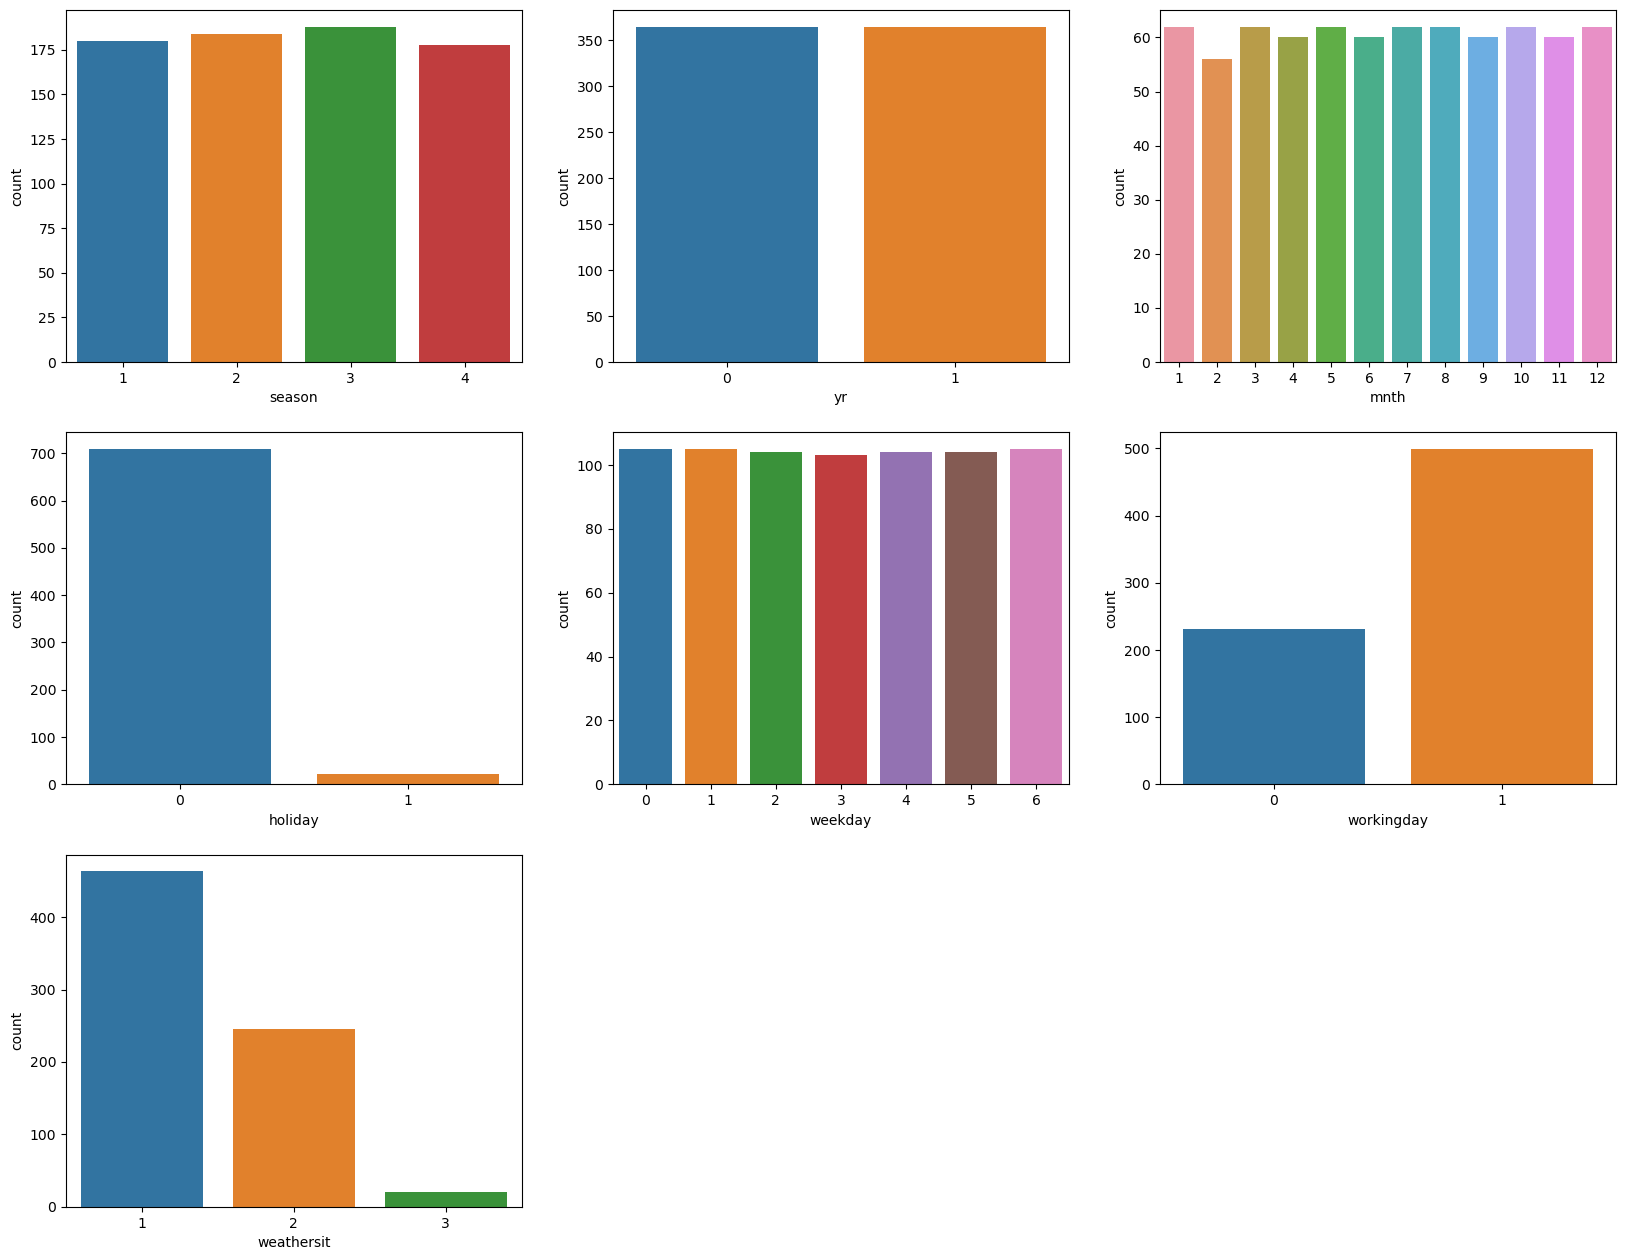

In [76]:
#visualising categorical variables using count plot

plt.figure(figsize=(20, 32))
inc=0
for i in cat_var :
    inc=inc+1
    plt.subplot(6,3,inc)
    #sns.countplot(bike,x=i,stat='count')
    sns.countplot(bike,x=i)
    
plt.show()  

## Inferences

- Inferences suggest that when the weather is snowy or misty, the demand for bike-sharing decreases.
- This implies that unfavorable weather conditions, such as snow or mist, may deter individuals from opting for shared bikes, leading to a decline in demand.
- Clear Weather is the Best for High Demands:
- This suggests that when the weather is clear, people are more inclined to use shared bikes, potentially due to the pleasant conditions and increased willingness to engage in outdoor activities.
- The inference mentions the absence of recorded data for rainy weather.
- This could be due to the unavailability of data during rainy conditions or a lack of bike-sharing activity during such weather.

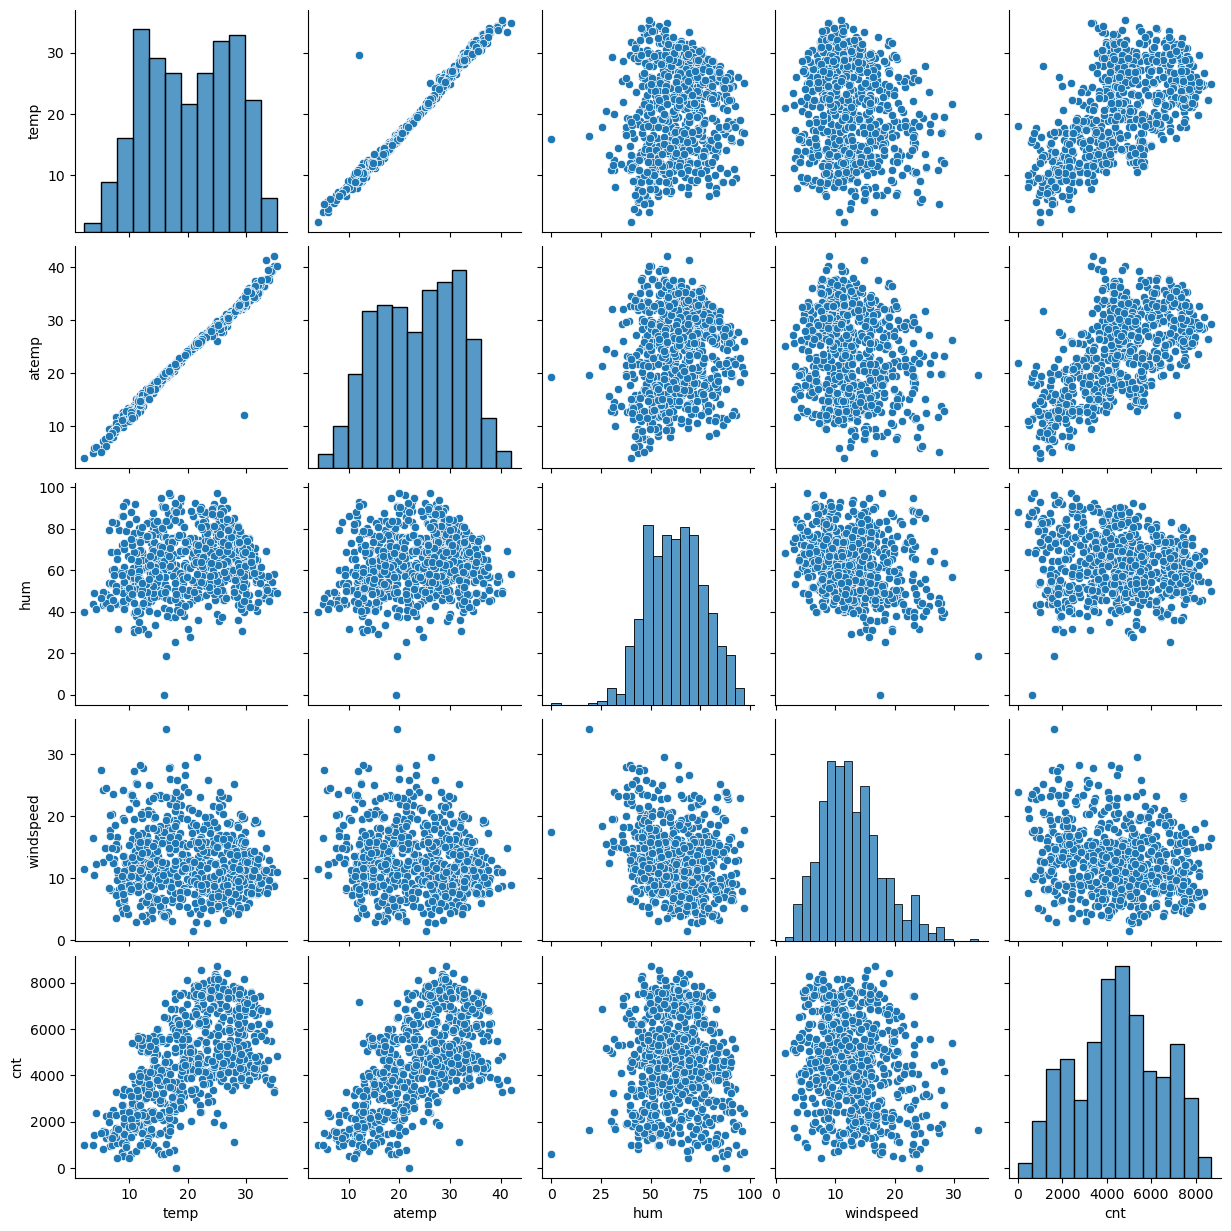

In [77]:
sns.pairplot(bike[num_var])
plt.show()

## Inferences

The provided inferences pertain to the analysis of two temperature-related columns, temp and atemp, and their relationship with the target variable cnt (presumably representing bike-sharing demand)

- This suggests a strong correlation or dependence between the temp (actual temperature) and atemp (feeling-like temperature) columns.
- The two temperature-related variables seem to exhibit a close relationship, indicating that changes in one variable are associated with corresponding changes in the other.
- The term "multicollinearity" refers to a situation where two or more independent variables in a regression model are highly correlated.
- In this context, the inference implies that temp and atemp exhibit multicollinearity, suggesting redundancy in information they provide to the model.
- This inference is based on a visual analysis of scatter plots, indicating that both temp and atemp show a linear relationship with the target variable cnt.
- A linear relationship implies that changes in temperature (both actual and perceived) are associated with a proportional change in bike-sharing demand.

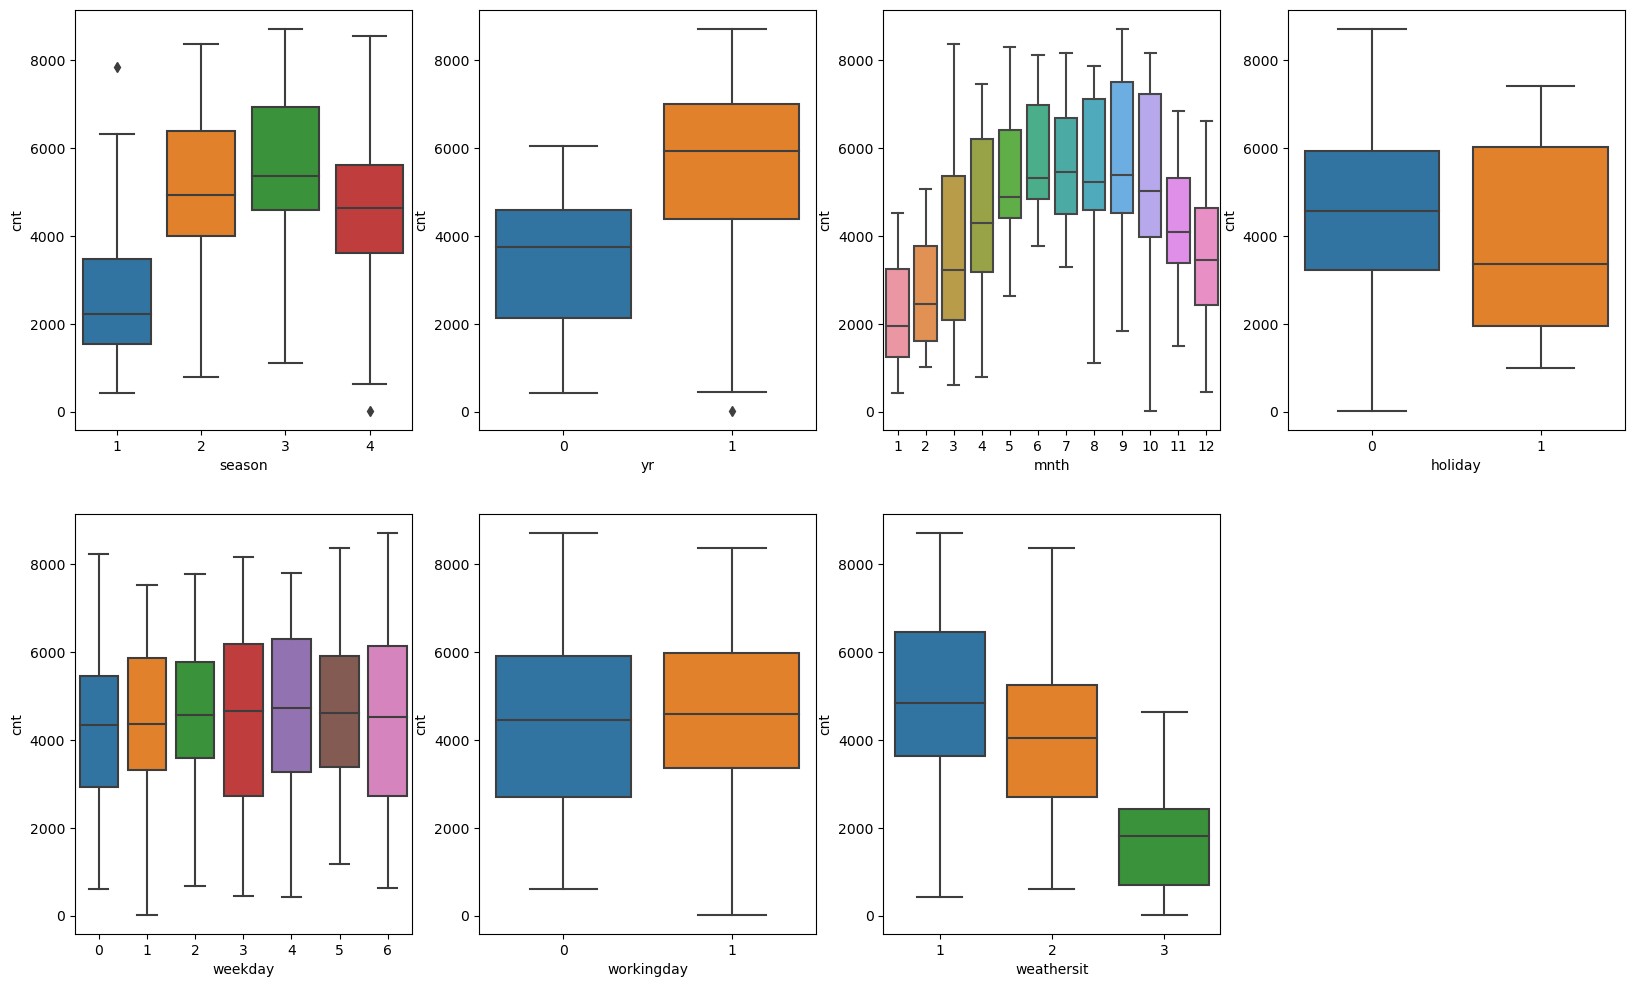

In [22]:
inc = 0
plt.figure(figsize=(20, 12))

for i in cat_var :
    inc=inc+1
    plt.subplot(2,4,inc)
    #sns.countplot(bike,x=i,stat='count')
    sns.boxplot(bike,x=i,y='cnt')
    
plt.show()

- The demand for shared bikes experiences a substantial increase during the summer and fall seasons compared to the spring and winter months.
- This suggests a notable year-over-year increase in bike-sharing demand.
Specifically, the demand in the year 2019 is reported to be double that of the demand observed in the year 2018.
From May to October, the Demand Keeps on Increasing:
- There is a temporal pattern highlighted, focusing on the months from May to October.
During this period, the demand for bike-sharing consistently rises, suggesting a positive trend in the warmer months.
Seconding the Findings of the Countplot, Clear Weather Plays an Important Role in the Demand:
- This statement reinforces the importance of clear weather conditions in influencing bike-sharing demand.
- Clear weather is identified as a significant factor contributing to increased demand, aligning with the findings from a countplot analysis.
- This highlights the relationship between bike-sharing demand and working days (presumably weekdays).
- The demand for shared bikes remains consistently high on working days, indicating a potential correlation with commuting patterns or weekday activities.

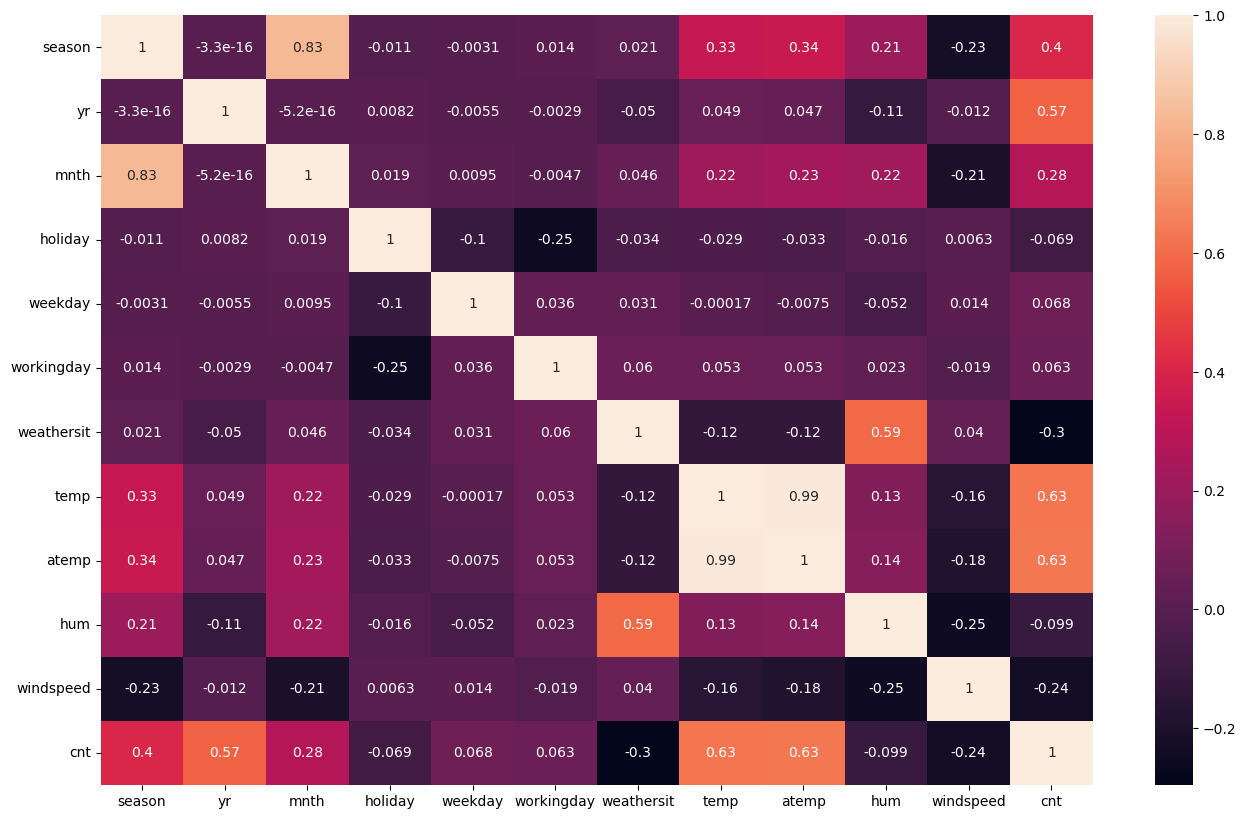

In [78]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True)
plt.show()

## Data Preperation

In [81]:
bike.shape

(730, 12)

In [82]:
#Changing datatype of season and weathersit columns to object, to create dummies

bike['season'] = bike.season.astype(object)
bike['weathersit'] = bike.weathersit.astype(object)

In [83]:
def season_map(x) :
    return x.map({1: 'spring', 2: 'summer', 3:'fall',4 :'winter'})

bike[['season']] = bike[['season']].apply(season_map)


In [84]:
def weather_map(x) :
    return x.map({1: 'Clear', 2: 'Misty', 3:'Snowy',4 :'Rainy'})

bike[['weathersit']] = bike[['weathersit']].apply(weather_map)

bike.columns


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [85]:
#Creating dummies for categorical variables season and weathersit

weather_conv = pd.get_dummies(bike[['season','weathersit']], drop_first = True)
weather_conv.head()

,season_spring,season_summer,season_winter,weathersit_Misty,weathersit_Snowy
0,1,0,0,1,0
1,1,0,0,1,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [86]:
#Adding dummy columns and removing original columns 

bike = pd.concat([bike,weather_conv],axis = 1)
bike= bike.drop(bike[['season','weathersit']], axis = 1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Misty,weathersit_Snowy
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [87]:
#Splitting the data into test and train set

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [88]:
#Using Minmax scaling to scale the columns in train set

scale=MinMaxScaler()

In [89]:
scale_var=['mnth','weekday']+num_var
df_train[scale_var] = scale.fit_transform(df_train[scale_var])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Misty,weathersit_Snowy
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0


In [90]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Misty,weathersit_Snowy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [113]:
#Dividing X and Y variables for train set

y_train = df_train.pop('cnt')
X_train = df_train

KeyError: 'cnt'

# Building a linear model with RFE

In [92]:
lm  = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select =12)
rfe = rfe.fit(X_train,y_train)

In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Misty', True, 1),
 ('weathersit_Snowy', True, 1)]

In [97]:
#Adding constant to the x training set
import statsmodels.api as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = stats.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,weekday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Misty,weathersit_Snowy
653,1.0,1,0,0.333333,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0
576,1.0,1,0,0.333333,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,1.000000,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0
728,1.0,1,0,0.000000,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,1.000000,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0


In [98]:
#Creating a linear model

lm = stats.OLS(y_train,X_train_rfe).fit()

In [99]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          7.57e-184
Time:                        23:59:57   Log-Likelihood:                 493.70
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     497   BIC:                            -906.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2599      0.036  

In [100]:
X_train_rfe = X_train_rfe.drop('const',axis=1)
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,377.51
4,atemp,366.59
5,hum,27.12
6,windspeed,4.90
7,season_spring,3.91
9,season_winter,3.23
2,weekday,3.12
8,season_summer,2.35
10,weathersit_Misty,2.28
0,yr,2.08


#### R-square Value is 0.83:

- The R-square value of 0.83 is an indicator of the goodness of fit for the regression model.
- An R-square value of 0.83 suggests that approximately 83% of the variability in the dependent variable (presumably bike-sharing demand) is explained by the independent variables in the model.
- atemp Column has High P-value - 0.679:

- The p-value is a measure of the statistical significance of an independent variable in predicting the dependent variable.
- A high p-value (0.679 in this case) for the atemp column suggests that this variable is not statistically significant in predicting the target variable.
- The variance inflation factor (VIF) is a measure of the extent to which the variance of an estimated regression coefficient increases due to collinearity.
- The statement indicates that both the temp and atemp columns have very high VIF values, suggesting a high degree of multicollinearity between these two variables.
- Given the high p-value for the atemp column and the identified multicollinearity, there's a recommendation to remove the atemp column first from the model.
- This removal is likely aimed at improving the model's interpretability, reducing multicollinearity, and potentially enhancing its predictive performance.
- Conclusion:  The inferences highlight the overall goodness of fit of the model (R-square), the lack of statistical significance for the atemp column, and the presence of multicollinearity between temp and atemp. The recommendation is to address these issues by removing the atemp column from the model.








In [101]:
# Removing atemp column from train set

X_train_1 = X_train_rfe.drop('atemp',axis = 1)

In [102]:
# Building linear model

X_train_r1 = stats.add_constant(X_train_1)
lm = stats.OLS(y_train, X_train_r1).fit()

In [103]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          5.38e-185
Time:                        00:03:44   Log-Likelihood:                 493.61
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     498   BIC:                            -912.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2597      0.036      7.194      0.000       0.189       0.331
yr                   0.2323      0.008     27.719      0.000       0.216       0.249
holiday             -0.0768      0.026     -2.908      0.004      -0.129      -0.025
weekday              0.0478      0.012      3.844      0.000       0.023       0.072
temp                 0.4946      0.034     14.475      0.000       0.427       0.562
hum                 -0.1246      0.039     -3.208      0.001      -0.201      -0.048
windspeed           -0.1822      0.027     -6.866      0.000      -0.234      -0.130
season_spring       -0.0745      0.020     -3.637      0.000      -0.115      -0.034
season_summer        0.0436      0.014      3.168      0.002       0.017       0.071
season_winter        0.0895      0.017      5.334      0.000       0.057       0.122
weathersit_Misty    -0.0577      0.011     -5.299      0.000      -0.079      -0.036
weathersit_Snowy    -0.2474      0.027     -9.091      0.000      -0.301      -0.194
==============================================================================
Omnibus:                       77.673   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.954
Skew:                          -0.787   Prob(JB):                     1.54e-41
Kurtosis:                       5.523   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Standard Errors:

In the context of regression analysis, standard errors are measures of the precision of the estimated coefficients.
Standard errors provide an indication of how much the estimated coefficients are likely to vary from the true population values.

#### Assumption about the Covariance Matrix of Errors:

The note emphasizes that the standard errors are calculated under the assumption that the covariance matrix of the errors is correctly specified.
The covariance matrix of errors is a key component in estimating the standard errors of regression coefficients.

#### Importance of Correct Specification:

The correctness of the covariance matrix specification is crucial for accurate standard error estimation.
If the assumed covariance structure is not appropriate or incorrectly specified, it may lead to biased standard errors, potentially affecting the validity of statistical inference and hypothesis testing.
#### Considerations:

Researchers and analysts should be mindful of the assumption regarding the covariance matrix and carefully assess whether it is appropriate for the given data and model.
Checking for heteroscedasticity (unequal variance of errors) and other assumptions related to the error structure is a common practice to ensure the reliability of regression results.

In [104]:
X_train_r1 = X_train_r1.drop(['const'], axis=1)
vif=pd.DataFrame()
vif['Features']=X_train_r1.columns
vif['VIF']=[variance_inflation_factor(X_train_r1.values,i) for i in range(X_train_r1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,27.07
3,temp,15.34
5,windspeed,4.68
6,season_spring,3.83
2,weekday,3.11
8,season_winter,3.09
9,weathersit_Misty,2.28
7,season_summer,2.25
0,yr,2.08
10,weathersit_Snowy,1.24


##### The provided inferences are drawn from the analysis of a revised regression model, referred to as "Model 2."

#### All Columns Have Very Less P-value:

This statement suggests that for all the columns in the revised model, the p-values are very low.
Low p-values typically indicate that the corresponding independent variables are statistically significant in predicting the dependent variable (bike-sharing demand, presumably).

#### hum Column has High VIF = 27.07:

The variance inflation factor (VIF) is a measure of the extent to which the variance of an estimated regression coefficient increases due to collinearity.
The statement indicates that the hum (humidity) column has a high VIF value of 27.07, suggesting a high degree of multicollinearity with other variables in the model.

#### So Removing hum from the Model:

Given the high VIF value for the hum column and the likelihood of multicollinearity issues, there is a recommendation to remove the hum variable from the model.
Removing hum is a strategic decision aimed at mitigating multicollinearity and potentially improving the interpretability and stability of the regression model.

Conclusion: The inferences highlight the statistical significance of all columns in the revised model based on low p-values. However, the decision to remove the hum column is driven by the high VIF value, indicating multicollinearity concerns. The goal is to enhance the overall quality of the regression model by addressing issues related to variable significance and multicollinearity.

In [105]:
X_train_2 = X_train_1.drop('hum',axis = 1)
X_train_r2 = stats.add_constant(X_train_2)
lm = stats.OLS(y_train, X_train_r2).fit()

In [106]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          5.40e-184
Time:                        00:09:33   Log-Likelihood:                 488.39
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     499   BIC:                            -908.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1948      0.030      6.456      0.000       0.136       0.254
yr                   0.2354      0.008     28.012      0.000       0.219       0.252
holiday             -0.0771      0.027     -2.892      0.004      -0.130      -0.025
weekday              0.0516      0.012      4.135      0.000       0.027       0.076
temp                 0.4683      0.033     13.988      0.000       0.403       0.534
windspeed           -0.1572      0.026     -6.141      0.000      -0.208      -0.107
season_spring       -0.0813      0.021     -3.958      0.000      -0.122      -0.041
season_summer        0.0392      0.014      2.840      0.005       0.012       0.066
season_winter        0.0786      0.017      4.740      0.000       0.046       0.111
weathersit_Misty    -0.0781      0.009     -8.760      0.000      -0.096      -0.061
weathersit_Snowy    -0.2821      0.025    -11.195      0.000      -0.332      -0.233
==============================================================================
Omnibus:                       76.041   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.991
Skew:                          -0.779   Prob(JB):                     8.23e-40
Kurtosis:                       5.458   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
X_train_r3 = X_train_r2
X_train_r2 = X_train_r2.drop('const',axis=1)
vif=pd.DataFrame()
vif['Features']=X_train_r2.columns
vif['VIF']=[variance_inflation_factor(X_train_r2.values,i) for i in range(X_train_r2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,windspeed,4.63
3,temp,4.36
2,weekday,3.10
5,season_spring,2.12
0,yr,2.07
6,season_summer,1.81
7,season_winter,1.68
8,weathersit_Misty,1.54
9,weathersit_Snowy,1.08
1,holiday,1.05


##### The provided inferences are from the analysis of a final regression model.

#### All Columns Have Very Low P-value:

This statement indicates that, in the final regression model, the p-values for all columns are very low.
Low p-values suggest that all the independent variables in the model are statistically significant in predicting the dependent variable (presumably bike-sharing demand).

#### All Columns Have Very Low VIF:

The variance inflation factor (VIF) is a measure of the extent to which the variance of an estimated regression coefficient increases due to collinearity.
The statement further notes that all columns in the final model have very low VIF values, indicating minimal multicollinearity issues.

#### So Considering It as the Final Prediction Model:

Based on the low p-values and low VIF values for all columns, there is a conclusion that the current model is deemed satisfactory and is being considered as the final prediction model.

#### Conclusion:
In summary, the inferences suggest that the final regression model has addressed issues related to both statistical significance (low p-values) and multicollinearity (low VIF values). The model is considered robust, and it is deemed suitable for making predictions, presumably regarding bike-sharing demand.

# Residual Analysis¶

In [108]:
# Scaling the varibles in the test dataset

df_test[scale_var] = scale.transform(df_test[scale_var])

In [109]:
# Splitting into X and Y 
y_test = df_test.pop('cnt')
X_test = df_test[X_train_r2.columns]

In [110]:
#Adding constant to the model and calculating y-pred value

X_test = stats.add_constant(X_test)
y_test_pred = lm.predict(X_test)

In [111]:
# Calculating R2 square on test set
r2_score(y_test, y_test_pred)

0.8058777271560256

Text(0, 0.5, 'y_test_pred')

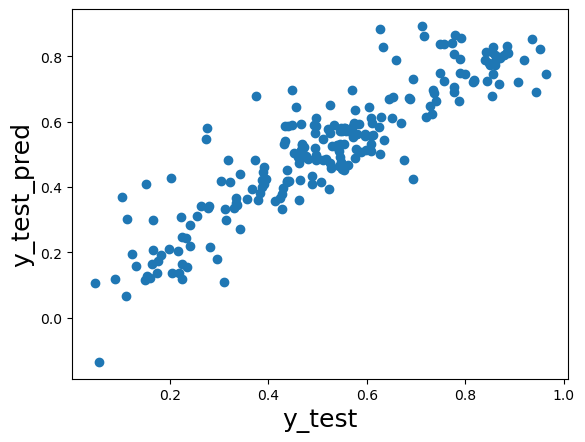

In [112]:
#Plotting a scatter plot for target variable and it's predicted variable

plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred',fontsize=18)

## Prediction Summary:

- Train set R-square: 0.83, Test set R-square: 0.80
- Small difference between train and test R-square values suggests a good and consistent model.
- Probability of F-statistics is significantly less than 0, ensuring model validity.
- P-values and VIF of features are within an acceptable range.
- Error is normally distributed.
- Predicted values are close to the best fit line in a linear regression pattern.
- Post-pandemic, demand is expected to be twice next year.
- Summer and fall seasons have high demand, suggesting potential profit by increasing bikes for rent and adjusting prices.
- Spring sees a rapid decline in demand, recommending discounts during this period.
- Weekdays have high demand, while holidays negatively impact demand.
- Unclear weather negatively affects demand, advising planning based on weather forecasts.
- Lower windspeed is associated with greater demand.